Parameters:
PRE: Precipitation data (mm).
Optional parameters:
Axis:  If not specified (None), multi-dimensional data will be flattened to one dimension for calculation.
Scale: Time scale. Default is 1. For example, 1 for monthly, 3 for quarterly, or others.
Periodicity: Periodicity. Default is 12, representing the yearly cycle.
Distribution: This parameter specifies the distribution type used for internal fitting/transformation calculations. The default is Gamma.
FitMethod : This parameter specifies the method used for internal fitting/transformation calculations for parameter estimation. The default is MLE (Maximum Likelihood Estimation).
Calibration : This parameter specifies the period of data involved in internal parameter fitting calculations. The default (None) is all data.


By utilizing the gma library, the Standardized Precipitation Index (SPI) was calculated using ERA5 precipitation data from 1980 to 2022.The range specified for the calculation of the SPI is from 80°E to 90°E longitude and from 30°N to 40°N latitude.

Import Libraries and Modules:
from gma import climet: Import the climet module from the gma library, which may contain functions for calculating climate indices such as SPI.
import xarray as xr: Importing the xarray library, which is used for handling multidimensional array data and is particularly suitable for working with geospatial data.
import matplotlib.pyplot as plt: Import the matplotlib.pyplot library and give it an alias plt, which is used for plotting graphics.
The construction of gma relies on libraries such as gdal 3.4.1+, numpy 1.23.3+, pandas 1.4.2+, scipy 1.7.3+, and matplotlib 3.5.2+, which are the foundation for the functionality provided by gma. To ensure the complete installation of gdal, it is recommended to download the compiled version of the corresponding whl package and install it manually on Windows.
Website reference (GDAL-3.4.3-cp39-cp39-win_amd64.whl.) : https://wwt.lanzout.com/i0Igt1oqiy8h
Website reference (pip install gma):https://pypi.org/project/gma/

In [14]:
from gma import climet
from gma import io
import matplotlib.pyplot as plt
import pandas as pd

Read data

In [15]:
ELSXLayer = io.ReadVector('C:/PRE_ET1.xlsx')
Data = ELSXLayer.ToDataFrame()
PRE = Data['PRE'].values

Calculate SPI values at different time scales:

In [16]:
SPI1 = climet.Index.SPI(PRE)
SPI3 = climet.Index.SPI(PRE, Scale=3)
SPI6 = climet.Index.SPI(PRE, Scale=6)
SPI12 = climet.Index.SPI(PRE, Scale=12)
SPI24 = climet.Index.SPI(PRE, Scale=24)
SPI60 = climet.Index.SPI(PRE, Scale=60)
dates = pd.date_range(start='1980-01', periods=len(PRE), freq='M')

Plotting:Creating a figure with 6 subplots

Defining colors and labels

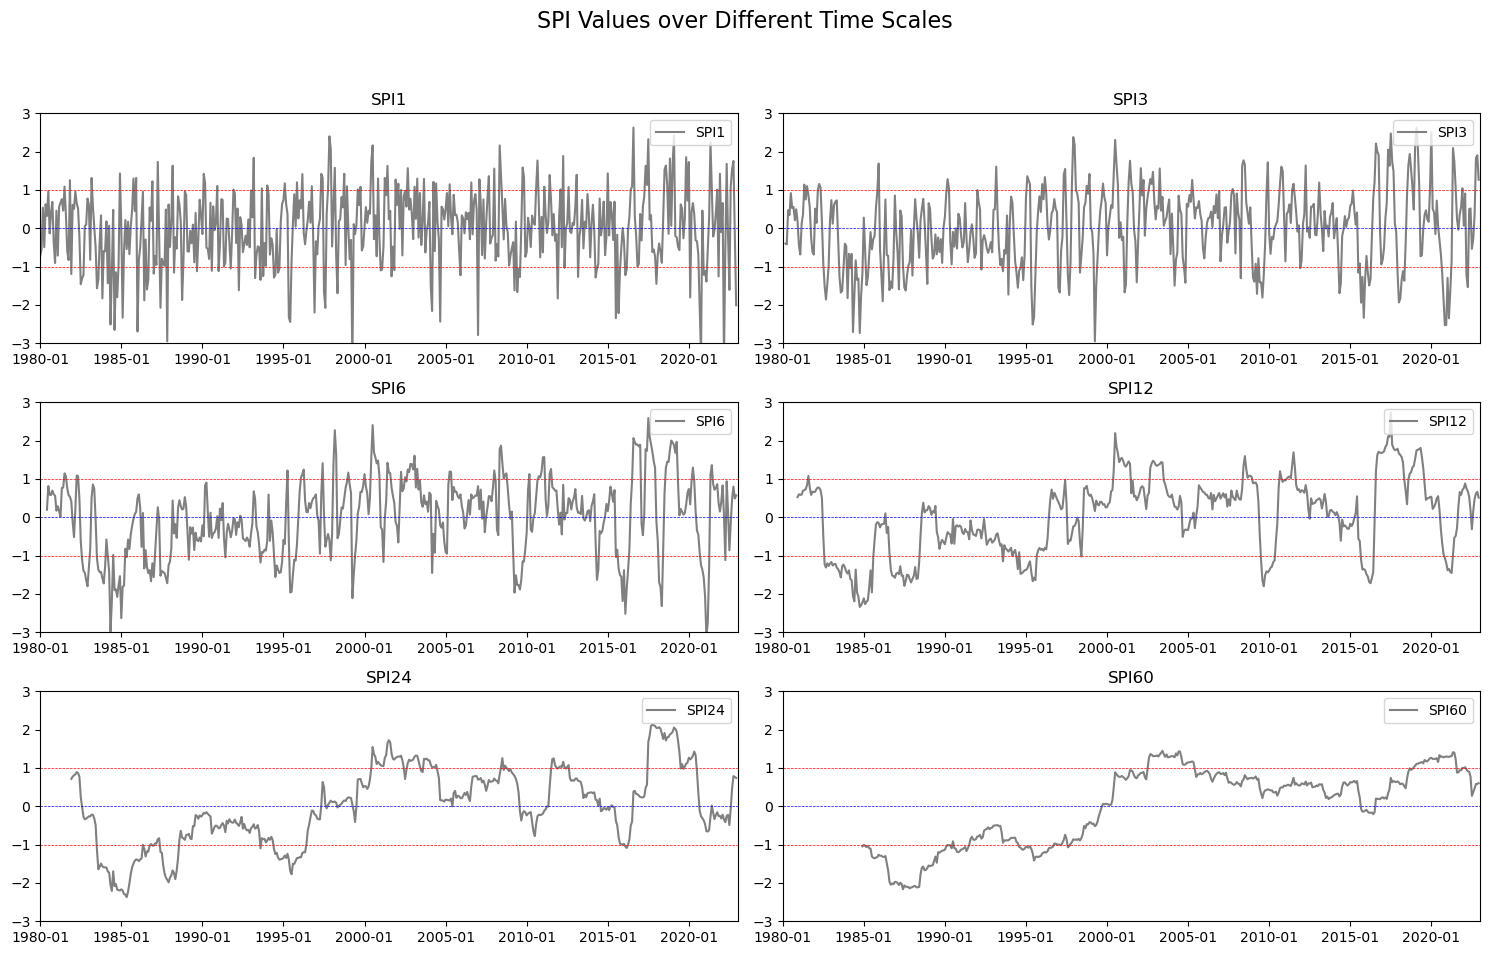

In [17]:
# Creating a figure with 6 subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('SPI Values over Different Time Scales', fontsize=16)

# Defining colors and labels
colors = ['grey', 'grey', 'grey', 'grey', 'grey', 'grey']
labels = ['SPI1', 'SPI3', 'SPI6', 'SPI12', 'SPI24', 'SPI60']
data = [SPI1, SPI3, SPI6, SPI12, SPI24, SPI60]

# Setting the x-axis tick labels
year_interval = 5
year_ticks = [i for i in range(0, len(dates), 12 * year_interval)]
year_labels = [f'{year}-01' for year in range(1980, 2023, year_interval)]

# Plotting SPI data and setting custom x-axis tick labels
for i in range(3):
    for j in range(2):
        ax = axs[i, j]
        spi_data = data[i * 2 + j]
        ax.plot(spi_data, color=colors[i * 2 + j], label=labels[i * 2 + j])
        ax.axhline(0, color='blue', linestyle='--', linewidth=0.5)
        ax.axhline(1, color='red', linestyle='--', linewidth=0.5)
        ax.axhline(-1, color='red', linestyle='--', linewidth=0.5)
        ax.legend(loc='upper right')
        ax.set_title(labels[i * 2 + j])

        # Setting the x and y-axis tick labels using ha='center' to ensure proper center alignment of the labels
        ax.set_xticks(year_ticks)
        ax.set_xticklabels(year_labels, ha='center')
        ax.set_xlim([0, len(spi_data)])  
        ax.set_ylim([-3, 3])  

#Adjusting the spacing between subplots and displaying the figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

By utilizing the gma library, the Standardized Precipitation Index (SPI) was calculated using ERA5 precipitation data from 1980 to 2022.The range specified for the calculation of the SPI is from 80°E to 90°E longitude and from 30°N to 40°N latitude.

In [18]:
from gma import climet
import matplotlib.pyplot as plt
import xarray as xr

In [19]:
ds = xr.open_dataset("C:/Cut_ERA5_Monthly_1980_2022_Total_precipitation.nc")['tp'].values
PRE = ds

In [20]:
SPI1 = climet.Index.SPI(PRE, Axis=0)
SPI3 = climet.Index.SPI(PRE, Axis=0, Scale=3)
SPI6 = climet.Index.SPI(PRE, Axis=0, Scale=6)
SPI12 = climet.Index.SPI(PRE, Axis=0, Scale=12)
SPI24 = climet.Index.SPI(PRE, Axis=0, Scale=24)
SPI60 = climet.Index.SPI(PRE, Axis=0, Scale=60)

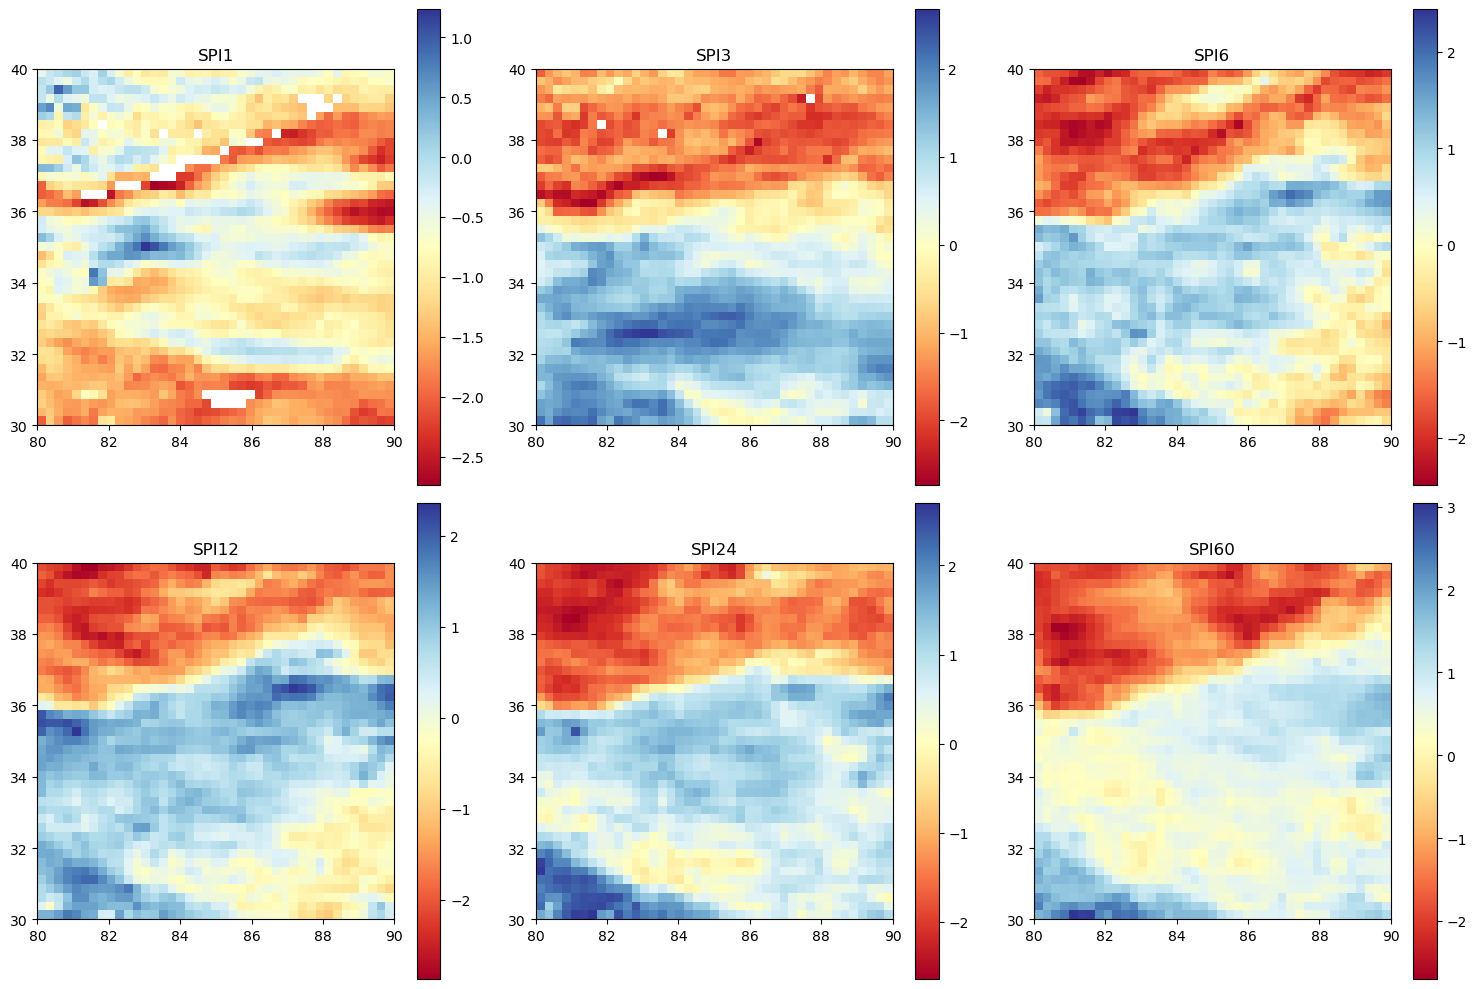

In [21]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
lon_start, lon_end = 80, 90
lat_start, lat_end = 30, 40

for ax, spi, scale in zip(axs.flatten(), [SPI1, SPI3, SPI6, SPI12, SPI24, SPI60], [1, 3, 6, 12, 24, 60]):

    im = ax.imshow(spi[-1, :, :], cmap='RdYlBu', extent=[lon_start, lon_end, lat_start, lat_end])

    ax.set_title(f'SPI{scale}')

    fig.colorbar(im, ax=ax)

    ax.set_xticks(range(lon_start, lon_end + 1, 2))
    ax.set_yticks(range(lat_start, lat_end + 1, 2)) 

plt.tight_layout() 
plt.show()

In [22]:
from gma import climet
from gma import io
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
ELSXLayer = io.ReadVector('C:/PRE_ET1.xlsx')
Data = ELSXLayer.ToDataFrame()
PRE = Data['PRE'].values
ET0 = Data['ET0'].values

In [24]:
SPEI1 = climet.Index.SPEI(PRE, ET0)
SPEI3 = climet.Index.SPEI(PRE, ET0, Scale = 3)
SPEI6 = climet.Index.SPEI(PRE, ET0, Scale = 6)
SPEI12 = climet.Index.SPEI(PRE, ET0, Scale = 12)
SPEI24 = climet.Index.SPEI(PRE, ET0, Scale = 24)
SPEI60 = climet.Index.SPEI(PRE, ET0, Scale = 60)
dates = pd.date_range(start='1980-01', periods=len(PRE), freq='M')

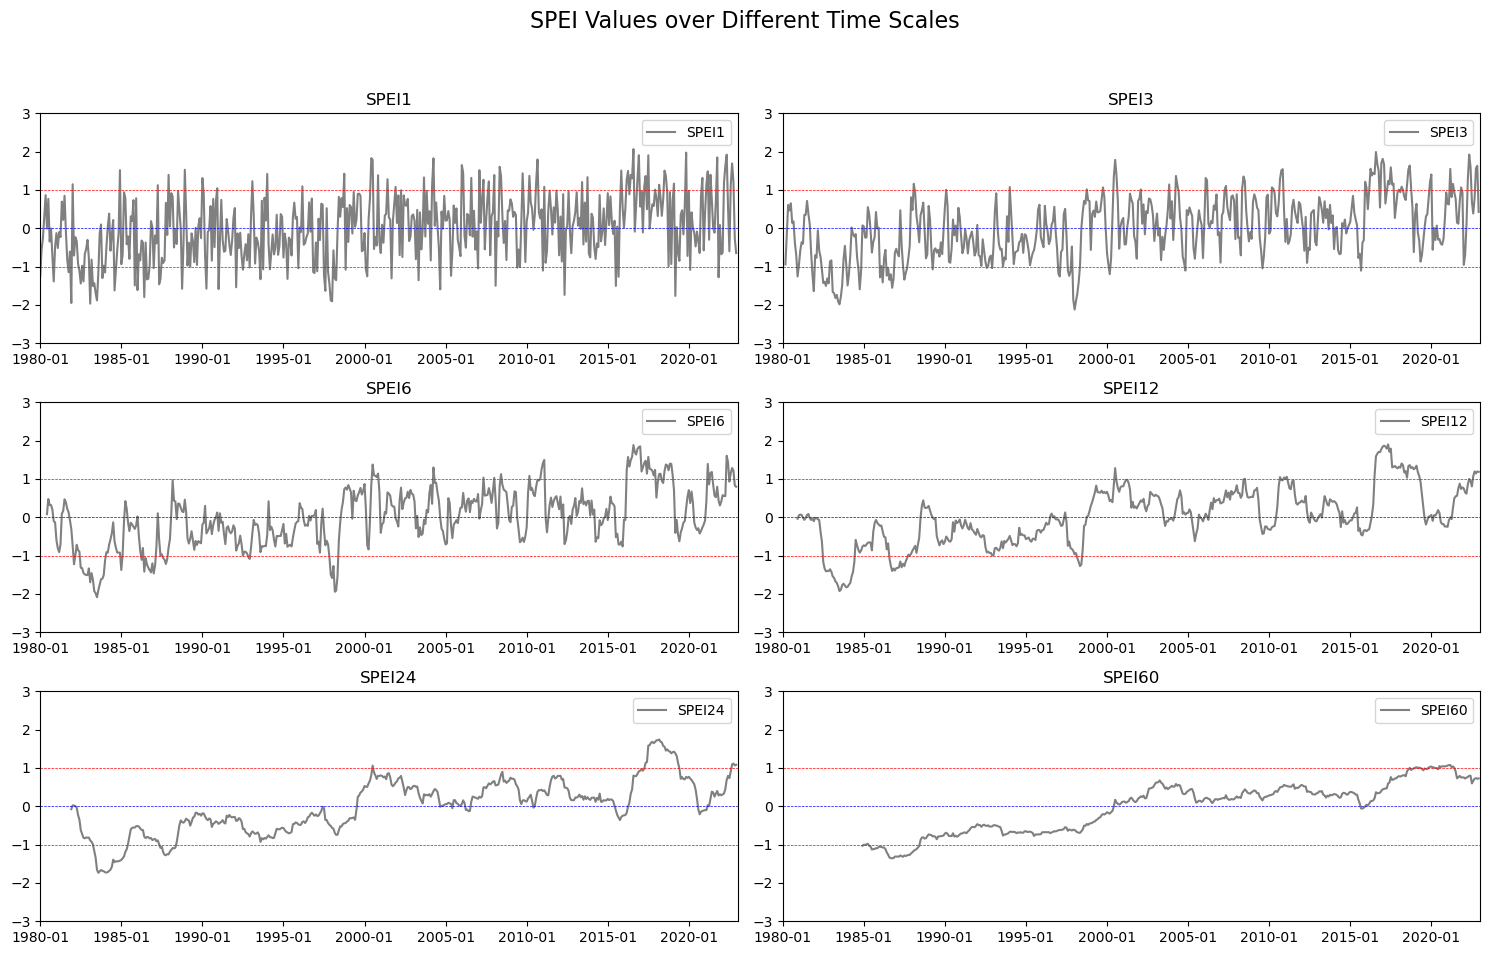

In [25]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('SPEI Values over Different Time Scales', fontsize=16)

colors = ['grey', 'grey', 'grey', 'grey', 'grey', 'grey']
labels = ['SPEI1', 'SPEI3', 'SPEI6', 'SPEI12', 'SPEI24', 'SPEI60']
data = [SPEI1, SPEI3, SPEI6, SPEI12, SPEI24, SPEI60]

year_interval = 5
year_ticks = [i for i in range(0, len(dates), 12 * year_interval)]
year_labels = [f'{year}-01' for year in range(1980, 2023, year_interval)]


for i in range(3):
    for j in range(2):
        ax = axs[i, j]
        spi_data = data[i * 2 + j]
        ax.plot(spi_data, color=colors[i * 2 + j], label=labels[i * 2 + j])
        ax.axhline(0, color='blue', linestyle='--', linewidth=0.5)
        ax.axhline(1, color='red', linestyle='--', linewidth=0.5)
        ax.axhline(-1, color='red', linestyle='--', linewidth=0.5)
        ax.legend(loc='upper right')
        ax.set_title(labels[i * 2 + j])

        
        ax.set_xticks(year_ticks)
        
        ax.set_xticklabels(year_labels, ha='center')

        ax.set_xlim([0, len(spi_data)]) 
        ax.set_ylim([-3, 3])  


plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

By utilizing the gma library, the Standardized Precipitation Evapotranspiration Index (SPEI) was calculated using ERA5 precipitation data and potential evapotranspiration data from 1980 to 2022.The range specified for the calculation of the SPEI is from 80°E to 90°E longitude and from 30°N to 40°N latitude.

In [26]:
from gma import climet
import matplotlib.pyplot as plt
import xarray as xr

In [27]:
ds = xr.open_dataset("C:/Cut_ERA5_Monthly_1980_2022_Total_precipitation.nc")['tp'].values
ds_E = xr.open_dataset("C:/Cut_ERA5_Monthly_1980_2022_Potnetial_evaporation.nc")['pev'].values
PRE = ds
ET0 = ds_E

In [28]:
SPEI1 = climet.Index.SPEI(PRE, ET0, Axis=0)
SPEI3 = climet.Index.SPEI(PRE, ET0, Axis=0, Scale=3)
SPEI6 = climet.Index.SPEI(PRE, ET0, Axis=0, Scale=6)
SPEI12 = climet.Index.SPEI(PRE, ET0, Axis=0, Scale=12)
SPEI24 = climet.Index.SPEI(PRE, ET0, Axis=0, Scale=24)
SPEI60 = climet.Index.SPEI(PRE, ET0, Axis=0, Scale=60)

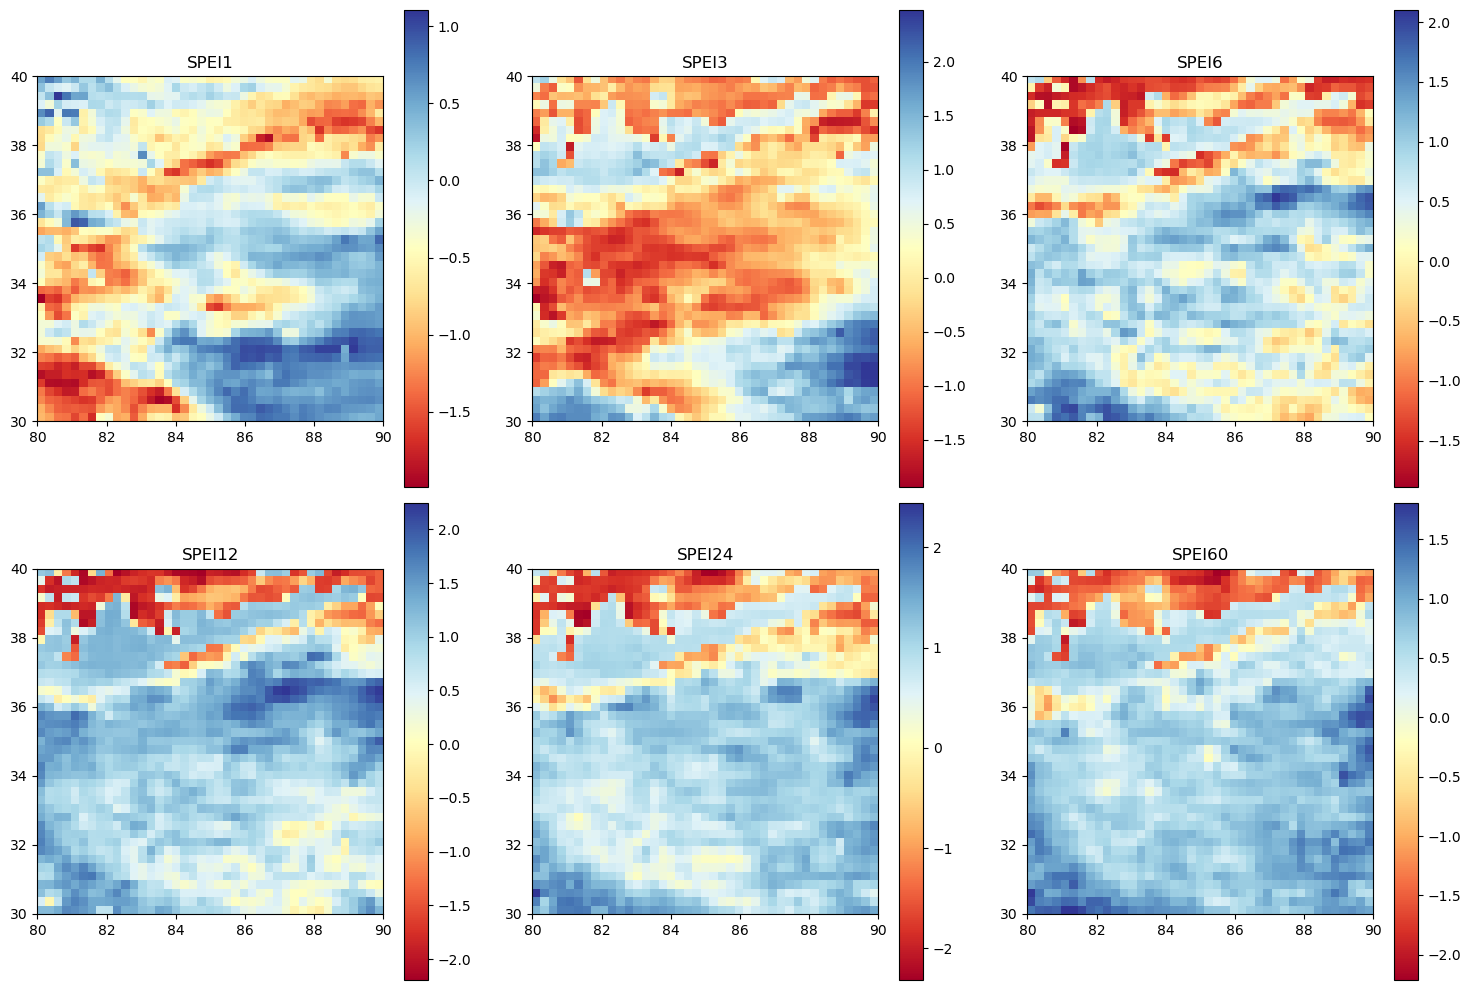

In [29]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.8, hspace=0.4)

lon_start, lon_end = 80, 90
lat_start, lat_end = 30, 40

for ax, spei, scale in zip(axs.flatten(), [SPEI1, SPEI3, SPEI6, SPEI12, SPEI24, SPEI60], [1, 3, 6, 12, 24, 60]):
    
    im = ax.imshow(spei[-1, :, :], cmap='RdYlBu', extent=[lon_start, lon_end, lat_start, lat_end])
    
    ax.set_title(f'SPEI{scale}')
    
    fig.colorbar(im, ax=ax)
    
    ax.set_xticks(range(lon_start, lon_end + 1, 2))  
    ax.set_yticks(range(lat_start, lat_end + 1, 2)) 

plt.tight_layout() 
plt.show()